<a href="https://colab.research.google.com/github/danielmlow/tutorials/blob/main/text/find_similar_phrases_bert.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cluster phrases using cosine similarity between Bert vectors


shift + Enter to run each cell

In [ ]:
import pandas as pd
import numpy as np
import os
from sentence_transformers import SentenceTransformer, util

In [ ]:
# LOG INTO GOOGLE DRIVE
# On google colab
# Mount GDrive and attach it to the colab for data I/O
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# CHANGE YOUR PATH to wherever it is on google drive.
input_dir = '/content/drive/My Drive/Diversity Inclusion and Exclusion in Suicide Research Review/Data/Input/'
output_dir = '/content/drive/My Drive/Diversity Inclusion and Exclusion in Suicide Research Review/Data/Output/' # https://drive.google.com/drive/folders/1ev6cyEfLhJCfCuCriKgKXfgyBlNuFspn?usp=sharing

In [ ]:
# Load keywords (change filename and column name)
df = pd.read_csv(output_dir+'keywords_merged_frequency_above_one_alphabetical_2022-01-24.csv', index_col=0)
keyword_column = 'keyword'
df

This script uses `all-MiniLM-L6-v2` model from HuggingFace. Description: "We used the pretrained microsoft/MiniLM-L12-H384-uncased model and fine-tuned in on a 1B sentence pairs dataset. We use a contrastive learning objective: given a sentence from the pair, the model should predict which out of a set of randomly sampled other sentences, was actually paired with it in our dataset."

In [ ]:
!pip install sentence_transformers

In [ ]:
model = SentenceTransformer('all-MiniLM-L6-v2')

In [ ]:
# https://www.sbert.net/examples/applications/paraphrase-mining/README.html
# Single list of sentences - Possible tens of thousands of sentences
sentences = ['The cat sits outside',
             'A man is playing guitar',
             'I love pasta',
             'The new movie is awesome',
             'The cat plays in the garden',
             'A woman watches TV',
             'The new movie is so great',
             'Do you like pizza?']

paraphrases = util.paraphrase_mining(model, sentences)

for paraphrase in paraphrases[0:10]:
    score, i, j = paraphrase
    print("{} \t\t {} \t\t Score: {:.4f}".format(sentences[i], sentences[j], score))

The new movie is awesome 		 The new movie is so great 		 Score: 0.8939
The cat sits outside 		 The cat plays in the garden 		 Score: 0.6788
I love pasta 		 Do you like pizza? 		 Score: 0.5096
I love pasta 		 The new movie is so great 		 Score: 0.2560
I love pasta 		 The new movie is awesome 		 Score: 0.2440
A man is playing guitar 		 The cat plays in the garden 		 Score: 0.2105
The new movie is awesome 		 Do you like pizza? 		 Score: 0.1969
The new movie is so great 		 Do you like pizza? 		 Score: 0.1692
The cat sits outside 		 A woman watches TV 		 Score: 0.1310
The cat plays in the garden 		 Do you like pizza? 		 Score: 0.0900


,keyword,frequency,examples_full_match_0,examples_full_match_1,examples_partial_match_0,examples_partial_match_1
0,13_reasons_why,5,suicide_contagion copycat_suicides media netfl...,13_reasons_why suicide suicidal_behavior risk ...,bullying suicidality adolescents 13_reasons_why,13_reasons_why sexual_violence toxic_masculini...
1,19th_century,2,ireland suicide 19th_century,suicide news 19th_century austrian_monarchy we...,ireland suicide 19th_century,suicide news 19th_century austrian_monarchy we...
2,2r,2,r-ketamine 2r 6r-hydroxynorketamine deuterium_...,rapid-acting_antidepressant depression suicide...,rapid-acting_antidepressant depression suicide...,r-ketamine 2r 6r-hydroxynorketamine deuterium_...
3,4-18f-adam,2,4-18f-adam major_depressive_disorder positron_...,suicide depression military_conscript serotoni...,suicide depression military_conscript serotoni...,4-18f-adam major_depressive_disorder positron_...
4,5-ht1a,2,attemped_suicide 5-ht1a 5-ht2a receptor_bindin...,meta-analysis 5-ht1a molecular_imaging depression,meta-analysis 5-ht1a molecular_imaging depression,antidepressant 5-ht1a_partial_agonist major_de...
...,...,...,...,...,...,...
5438,youth_violence,4,youth_violence youth_suicide youth_gun-carrying,community_violence suicidality psychological_d...,community_violence suicidality psychological_d...,community_gardens urban_agriculture urban_land...
5439,youths,5,suicide self-harm non-suicidal_self-injury ado...,risk suicide youths television_series_viewing,long-run_trends antidepressant_use youths fda_...,risk suicide youths television_series_viewing
5440,zest_for_life,2,mindfulness resilience zest_for_life interpers...,mindfulness zest_for_life suicide_risk suicide...,mindfulness resilience zest_for_life interpers...,mindfulness zest_for_life suicide_risk suicide...
5441,zimbabwe,2,evidence-based_intervention depression common_...,intimate_partner_violence postnatal_depression...,intimate_partner_violence postnatal_depression...,evidence-based_intervention depression common_...


In [ ]:
sentences = df[keyword_column].values
assert len(sentences)==len(np.unique(sentences))


In [ ]:
paraphrases = util.paraphrase_mining(model, sentences)
print(len(paraphrases))
paraphrases = pd.DataFrame(paraphrases)
paraphrases

In [ ]:

paraphrases_df = []
for paraphrase in paraphrases.values[0:5000]:
    score, i, j = paraphrase

    paraphrases_df.append([sentences[int(i)], sentences[int(j)], score])
paraphrases_df = pd.DataFrame(paraphrases_df)
paraphrases_df
    # print("{} \t\t {} \t\t Score: {:.4f}".format(sentences[i], sentences[j], score))

,0,1,2
0,non-suicidal_self‐injury,non‐suicidal_self‐injury,0.998059
1,non_suicidal_self-injury,non_suicidal_self_injury,0.994860
2,interpersonal-psychological_theory_of_suicide,interpersonal–psychological_theory_of_suicide,0.994773
3,non-suicidal_self-injury,non-suicidal_self_injury,0.994697
4,clinical_high-risk,clinical_high_risk,0.994656
...,...,...,...
4995,gambling_disorder,gambling_severity,0.791670
4996,suicidal_behaviours,suicide_methods,0.791642
4997,gender_difference,human_sex_differences,0.791627
4998,adolescent_offspring,young_adolescents,0.791617


In [ ]:
# you'll have the same pair in the reverse order or the same token in each column, so keep only one'
# # There are rows for (a,b), (b,a), and (a,a), (b,b) and sometimes more than twice due to how util.paraphrase_mining() batches samples for faster processing.
paraphrases_indexes = paraphrases[[1,2]]
paraphrases_indexes_sorted = np.sort(paraphrases_indexes[[1,2]],0)
# Just keep one
paraphrases_indexes = paraphrases_indexes.loc[pd.DataFrame(np.sort(paraphrases_indexes[[1,2]],0),index=paraphrases_indexes.index).drop_duplicates(keep='first').index]
paraphrases_unique = paraphrases.iloc[paraphrases_indexes.index]
paraphrases_unique
print(len(paraphrases_unique[1].values))
print(len(paraphrases_unique[1].unique()))

[[ 0  4]
 [ 0  4]
 [ 0  5]
 [ 0  6]
 [ 0  6]
 [ 0  6]
 [ 0  6]
 [ 0  6]
 [ 0  6]
 [ 0  6]
 [ 0  7]
 [ 0  7]
 [ 0  7]
 [ 0  7]
 [ 0  7]
 [ 0  7]
 [ 0  7]
 [ 0  7]
 [ 0  7]
 [ 0  7]
 [ 0  7]
 [ 0  7]
 [ 0  7]
 [ 0  7]
 [ 0  7]
 [ 0  7]
 [ 0  7]
 [ 0  7]
 [ 0  7]
 [ 0  8]
 [ 0  9]
 [ 0  9]
 [ 0  9]
 [ 0  9]
 [ 0  9]
 [ 0  9]
 [ 0  9]
 [ 0  9]
 [ 0  9]
 [ 0  9]
 [ 0  9]
 [ 0 10]
 [ 0 10]
 [ 0 10]
 [ 0 10]
 [ 0 10]
 [ 0 10]
 [ 0 10]
 [ 0 10]
 [ 0 10]]
(10749, 2)


In [ ]:

paraphrases_unique_df = []
for paraphrase in paraphrases_unique.values:
    score, i, j = paraphrase

    paraphrases_unique_df.append([sentences[int(i)], sentences[int(j)], score])
paraphrases_unique_df = pd.DataFrame(paraphrases_unique_df)
paraphrases_unique_df
    # print("{} \t\t {} \t\t Score: {:.4f}".format(sentences[i], sentences[j], score))

,0,1,2
0,non-suicidal_self‐injury,non‐suicidal_self‐injury,0.998059
1,interpersonal-psychological_theory_of_suicide,interpersonal–psychological_theory_of_suicide,0.994773
2,non-suicidal_self-injury,non-suicidal_self_injury,0.994697
3,attachment-based_family_therapy,attachment‐based_family_therapy,0.993877
4,treatment-resistant_depression,treatment_resistant_depression,0.991379
...,...,...,...
10744,google_trends,web,0.330836
10745,global_functioning,scale_development,0.330824
10746,arsenic,holocaust,0.330800
10747,androgens,freud,0.330756


In [ ]:
paraphrases_unique_df.to_csv(output_dir+'paraphrases_unique.csv')

# Done

In [ ]:
# Check there is not duplicate
paraphrases_unique_df[paraphrases_unique_df[0] != paraphrases_unique_df[1]]


,0,1,2
0,non-suicidal_self‐injury,non‐suicidal_self‐injury,0.998059
1,interpersonal-psychological_theory_of_suicide,interpersonal–psychological_theory_of_suicide,0.994773
2,non-suicidal_self-injury,non-suicidal_self_injury,0.994697
3,attachment-based_family_therapy,attachment‐based_family_therapy,0.993877
4,treatment-resistant_depression,treatment_resistant_depression,0.991379
...,...,...,...
10744,google_trends,web,0.330836
10745,global_functioning,scale_development,0.330824
10746,arsenic,holocaust,0.330800
10747,androgens,freud,0.330756


In [ ]:
a,b=paraphrases_df.iloc[0,:2].values
print(a,b)
print(a==b)
print(a[3]==b[3]) #the dashes are different


non-suicidal_self‐injury non‐suicidal_self‐injury
False
False


#word embeddings or word vectors

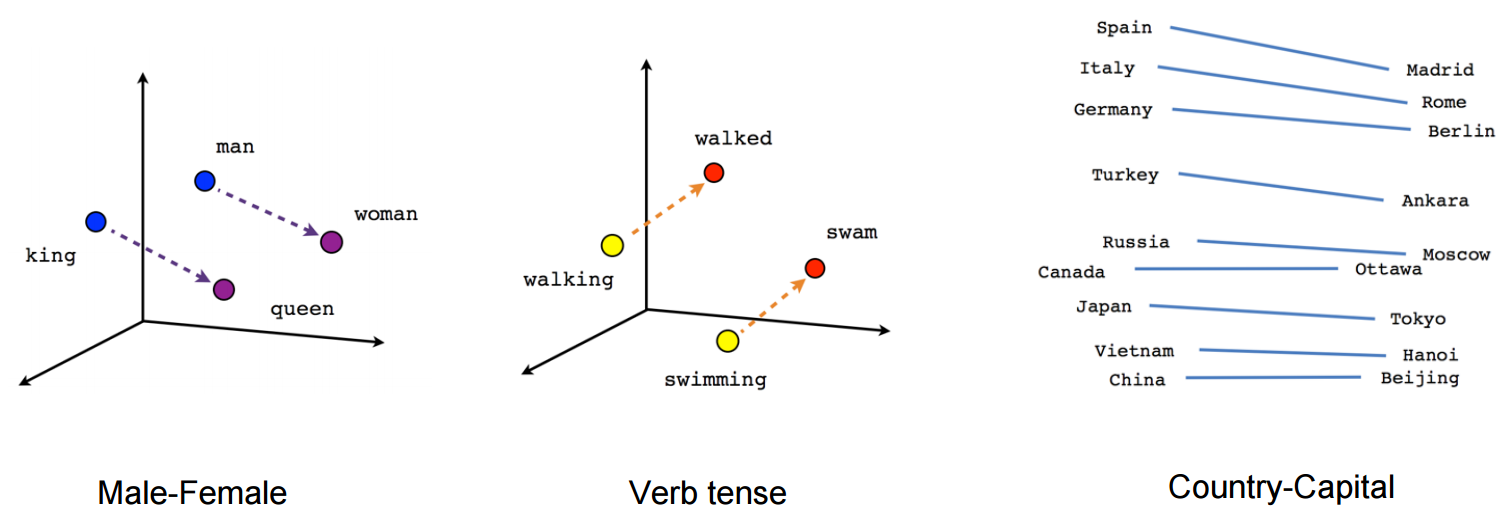

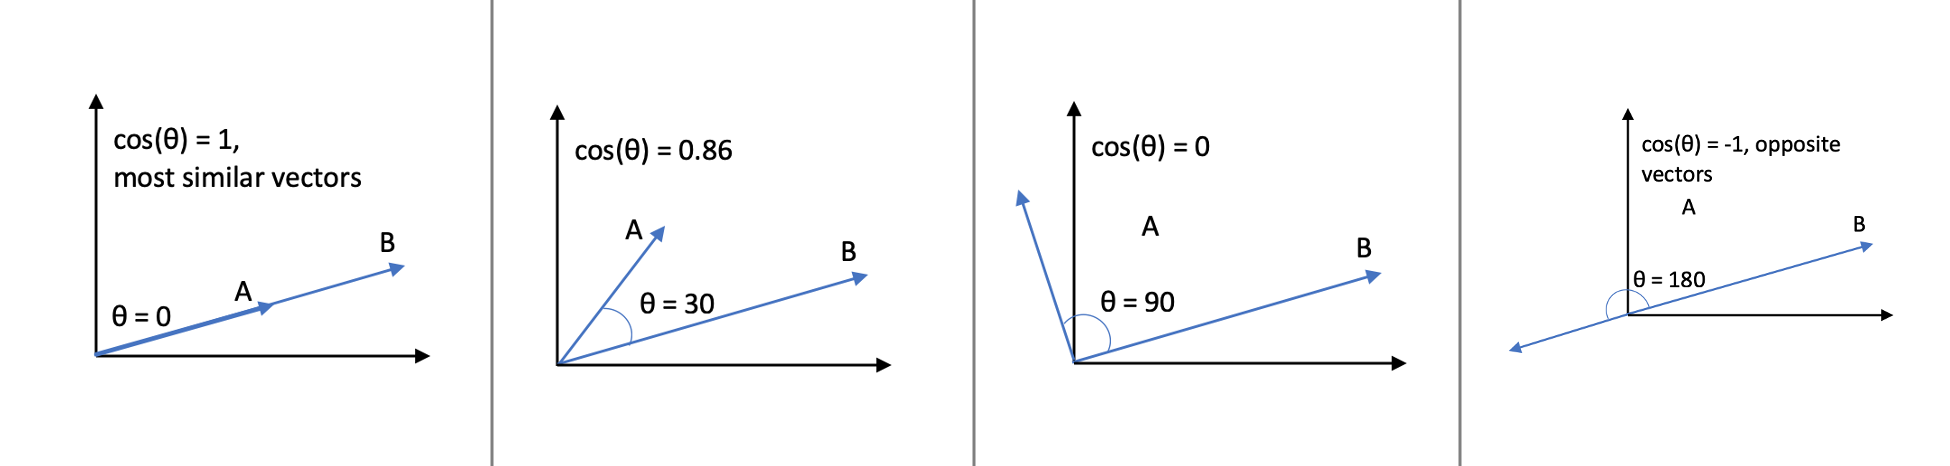

cosine similarity close to 1, very similar

cosine similarity close to 0, not related

cosine similarity close to -1, opposite meaning (related)


First learn about word embeddings (word vectors), then about BERT (sentence vectors)


Watch the first three videos here: https://www.coursera.org/lecture/nlp-sequence-models/word-representation-6Oq70
